# Step 1: Define the objective of the analysis

Analyse customer behaviour and business performance through transactions at a café in Cape Town during March 2024.

Sub-objectives:
- Identify which types of coffee sell the most.
- Study daily consumption patterns (which days or times sell the most?).
- Compare revenue between payment methods (cash vs card).
- Evaluate the average ticket per transaction.
- Analyse whether there are repeat customers (based on card ID).



# Step 2: Load Dataset

In [17]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
# Load file
df = pd.read_excel("Coffe_sales.xlsx")
# Show the first lines
df.head()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


# Step 3: Cleaning Dataset


In [18]:
# Check general info: data types and null values
df.info()

# Check for missing values by column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


,0
date,0
datetime,0
hour_of_day,0
cash_type,0
card,89
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0


In [19]:
# Show rows where 'card' is missing (NaN)
df[df['card'].isnull()].head(10)

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
12,2024-03-02,2024-03-02 10:30:35.668,10,cash,NaN,40.0,Latte,Morning,Sat,Mar,6,3
18,2024-03-03,2024-03-03 10:10:43.981,10,cash,NaN,40.0,Latte,Morning,Sun,Mar,7,3
41,2024-03-06,2024-03-06 12:30:27.089,12,cash,NaN,35.0,Americano with Milk,Afternoon,Wed,Mar,3,3
46,2024-03-07,2024-03-07 10:08:58.945,10,cash,NaN,40.0,Latte,Morning,Thu,Mar,4,3
49,2024-03-07,2024-03-07 11:25:43.977,11,cash,NaN,40.0,Latte,Morning,Thu,Mar,4,3
60,2024-03-09,2024-03-09 11:49:37.292,11,cash,NaN,40.0,Hot Chocolate,Morning,Sat,Mar,6,3
74,2024-03-10,2024-03-10 07:44:18.538,7,cash,NaN,30.0,Americano,Morning,Sun,Mar,7,3
75,2024-03-10,2024-03-10 07:45:29.441,7,cash,NaN,35.0,Americano with Milk,Morning,Sun,Mar,7,3
76,2024-03-10,2024-03-10 10:06:02.960,10,cash,NaN,40.0,Latte,Morning,Sun,Mar,7,3
78,2024-03-10,2024-03-10 17:51:03.048,17,cash,NaN,35.0,Americano with Milk,Night,Sun,Mar,7,3


In [20]:
# Convert 'date' and 'datetime' to proper datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop duplicate rows
df = df.drop_duplicates()

# Remove rows with missing or invalid 'money' values
df = df[df['money'].notnull() & (df['money'] > 0)]

# Standardize coffee names (remove spaces and capitalize properly)
df['coffee_name'] = df['coffee_name'].str.strip().str.title()

# Fill missing 'card' values with "No Card"
df['card'] = df['card'].fillna("No Card")

# Verify changes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3636 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


# Step 4: Exploratory Data Analysis (EDA)

## 1. Most Sold Coffee Types

In [26]:
import seaborn as sns
sns.set(style="whitegrid")

# Count how many times each coffee type was sold
coffee_counts = df['coffee_name'].value_counts()

# Get top 3 coffee types
top_3 = coffee_counts.head(3)

# Print interpretation
print("📊 Top 3 Most Sold Coffee Types:\n")
for coffee, count in top_3.items():
    print(f"- {coffee}: {count} sales")

print(f"\n☕️ Most popular coffee overall: '{top_3.index[0]}' with {top_3.iloc[0]} sales.")

# Optional: percentage of total
total_sales = coffee_counts.sum()
most_sold_percent = (top_3.iloc[0] / total_sales) * 100

print(f"\n➡️ This coffee alone represents approximately {most_sold_percent:.2f}% of all sales.")


📊 Top 3 Most Sold Coffee Types:

- Americano With Milk: 824 sales
- Latte: 782 sales
- Americano: 578 sales

☕️ Most popular coffee overall: 'Americano With Milk' with 824 sales.

➡️ This coffee alone represents approximately 22.66% of all sales.


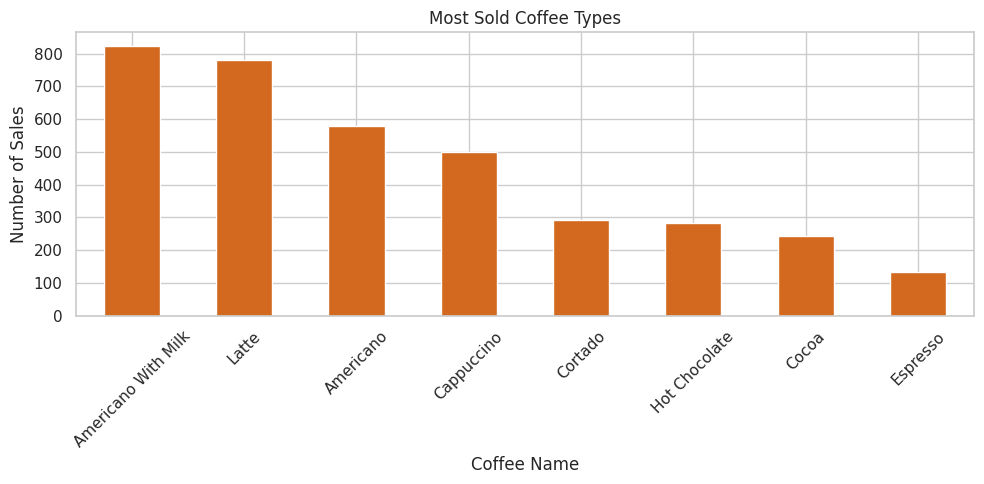

,count
coffee_name,
Americano With Milk,824
Latte,782
Americano,578
Cappuccino,501
Cortado,292
Hot Chocolate,282
Cocoa,243
Espresso,134


In [27]:


# Plot the top-selling coffee types
plt.figure(figsize=(10, 5))
coffee_counts.plot(kind='bar', color='chocolate')
plt.title('Most Sold Coffee Types')
plt.xlabel('Coffee Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the raw counts
coffee_counts

### Analysis of the results
🥇 **Americano With Milk** clearly dominates sales, with 824 transactions, representing 22.66% of all sales.

🥈 It is followed by **Latte** with 782, indicating that milk-based drinks are strongly preferred.

🥉 **Americano alone (without milk)** is also in the top 3, suggesting that classic styles are popular.

### 1.2. Total Revenue by Coffee Type

In [28]:
# Group and sum revenue by coffee name
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

# Top 3 coffee types by revenue
top_revenue = revenue_by_coffee.head(3)

# Print interpretation
print("💰 Top 3 Coffee Types by Total Revenue:\n")
for coffee, amount in top_revenue.items():
    print(f"- {coffee}: ZAR {amount:.2f}")

# Most profitable coffee
print(f"\n🏆 Highest revenue generator: '{top_revenue.index[0]}' with ZAR {top_revenue.iloc[0]:.2f}")

# Percentage of total revenue
total_revenue = revenue_by_coffee.sum()
percentage = (top_revenue.iloc[0] / total_revenue) * 100

print(f"\n➡️ This coffee represents approximately {percentage:.2f}% of the shop's total revenue.")


💰 Top 3 Coffee Types by Total Revenue:

- Latte: ZAR 27866.30
- Americano With Milk: ZAR 25269.12
- Cappuccino: ZAR 18034.14

🏆 Highest revenue generator: 'Latte' with ZAR 27866.30

➡️ This coffee represents approximately 24.14% of the shop's total revenue.


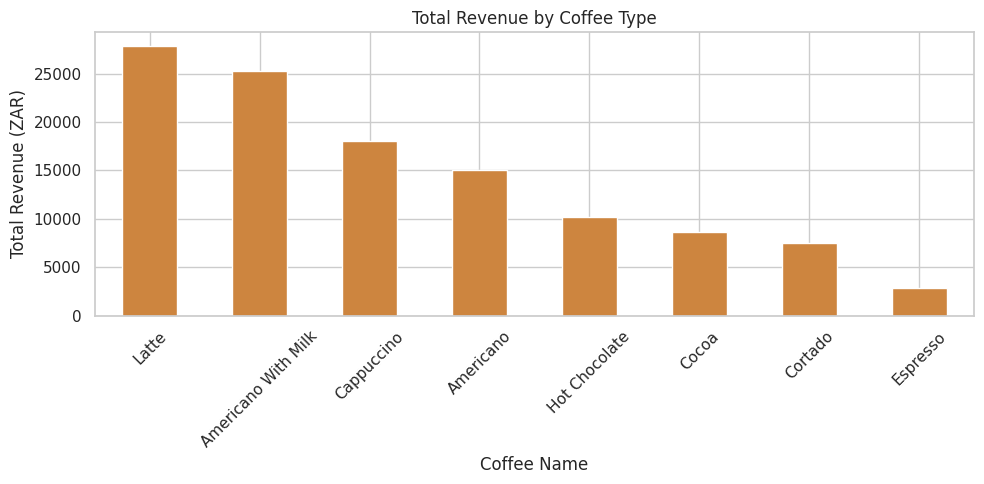

,money
coffee_name,
Latte,27866.30
Americano With Milk,25269.12
Cappuccino,18034.14
Americano,15062.26
Hot Chocolate,10172.46
Cocoa,8678.16
Cortado,7534.86
Espresso,2814.28


In [29]:


# Plot
plt.figure(figsize=(10, 5))
revenue_by_coffee.plot(kind='bar', color='peru')
plt.title('Total Revenue by Coffee Type')
plt.xlabel('Coffee Name')
plt.ylabel('Total Revenue (ZAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show raw data
revenue_by_coffee

#### Analysis of the results
🥇 **Latte** is the coffee that generates the most revenue: ZAR 27,866.30, representing 24.14% of total turnover.

🥈 It is followed by **Americano With Milk**, which was the best-selling in terms of quantity, but generates less total revenue than Latte.

🥉 **Cappuccino** enters the podium, although it did not appear in the Top 3 in terms of units sold.

## 2. Study daily consumption patterns

In [33]:
df['Weekday'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], dtype=object)

In [35]:

# Count number of sales per day of the week
sales_by_day = df['Weekday'].value_counts().loc[['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']]

top_day = sales_by_day.idxmax()
top_value = sales_by_day.max()

print(f"📈 The busiest day is **{top_day}** with {top_value} sales.")

📈 The busiest day is **Tue** with 585 sales.


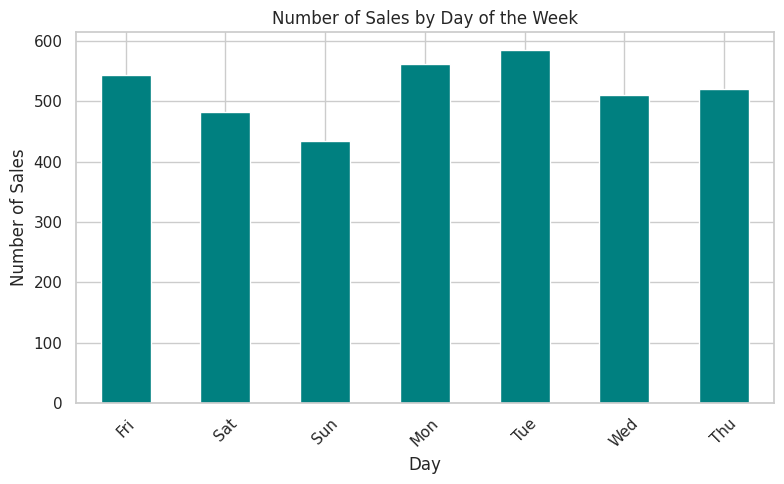

,count
Weekday,
Fri,544
Sat,482
Sun,434
Mon,561
Tue,585
Wed,510
Thu,520


In [36]:
# Plot
plt.figure(figsize=(8, 5))
sales_by_day.plot(kind='bar', color='teal')
plt.title('Number of Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the raw values
sales_by_day

### 2.2 Sales by Hour of the Day

In [37]:
# Count sales by hour of the day
sales_by_hour = df['hour_of_day'].value_counts().sort_index()

# Identify the top 3 busiest hours
top_hours = sales_by_hour.sort_values(ascending=False).head(3)

print("⏰ Top 3 Busiest Hours for Coffee Sales:\n")
for hour, count in top_hours.items():
    print(f"- {hour}:00 → {count} sales")

# Get the busiest hour
peak_hour = top_hours.idxmax()
peak_value = top_hours.max()

print(f"\n🚀 Peak hour is {peak_hour}:00 with {peak_value} total sales.")

⏰ Top 3 Busiest Hours for Coffee Sales:

- 10:00 → 349 sales
- 11:00 → 294 sales
- 16:00 → 282 sales

🚀 Peak hour is 10:00 with 349 total sales.


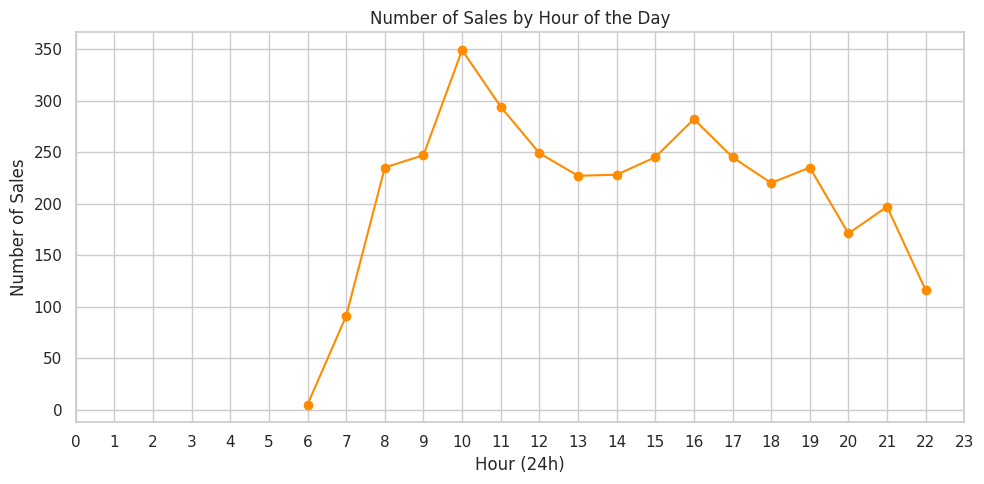

In [38]:
# Line plot of sales per hour
plt.figure(figsize=(10, 5))
sales_by_hour.plot(kind='line', marker='o', color='darkorange')
plt.title('Number of Sales by Hour of the Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#### Hourly sales analysis
🥇 10:00 is clearly the peak time, with 349 sales.

🥈 This is followed by 11:00 and 16:00, which also see high traffic.

These times reflect two key moments of the day:

☕ Mid-morning (10:00–11:00): probably a break from work, meetings, or a second cup of coffee.

🌇 Mid-afternoon (4:00 p.m.): perhaps a break after lunch or before the end of the working day.

## 3.Compare revenue between payment methods (cash vs card)

In [39]:
# Group total revenue by payment method
revenue_by_payment = df.groupby('cash_type')['money'].sum()

# Sort if needed
revenue_by_payment = revenue_by_payment.sort_values(ascending=False)

# Print the result
print("💰 Total Revenue by Payment Method:\n")
for method, total in revenue_by_payment.items():
    print(f"- {method}: ZAR {total:.2f}")

# Calculate percentage
total = revenue_by_payment.sum()
percent_card = (revenue_by_payment.get('card', 0) / total) * 100
percent_cash = (revenue_by_payment.get('cash', 0) / total) * 100

print(f"\n📊 Revenue Breakdown:")
print(f"- Card: {percent_card:.2f}% of total revenue")
print(f"- Cash: {percent_cash:.2f}% of total revenue")

💰 Total Revenue by Payment Method:

- card: ZAR 112245.58
- cash: ZAR 3186.00

📊 Revenue Breakdown:
- Card: 97.24% of total revenue
- Cash: 2.76% of total revenue


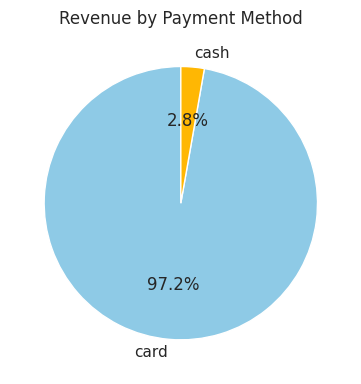

In [40]:
# Pie chart of revenue by payment method
plt.figure(figsize=(6, 4))
revenue_by_payment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#8ecae6', '#ffb703'])
plt.title('Revenue by Payment Method')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### Revenue analysis by payment method
💸 97.24% of total revenue comes from card payments.

🪙 Only 2.76% of revenue is in cash.


#### Interpretations
The café has a highly banked or digitised clientele, which may imply:

Frequent use of loyalty cards.

Sales to repeat customers (identified by card).

Possibly less need for cash handling at the till.

## 4. Average Ticket per Transaction

In [41]:
# Overall average ticket
avg_ticket_total = df['money'].mean()

# Average ticket by payment method
avg_ticket_by_payment = df.groupby('cash_type')['money'].mean()

# Print results
print(f"💳 Overall average ticket: ZAR {avg_ticket_total:.2f}\n")

print("📊 Average ticket by payment method:")
for method, avg in avg_ticket_by_payment.items():
    print(f"- {method}: ZAR {avg:.2f}")


💳 Overall average ticket: ZAR 31.75

📊 Average ticket by payment method:
- card: ZAR 31.65
- cash: ZAR 35.80


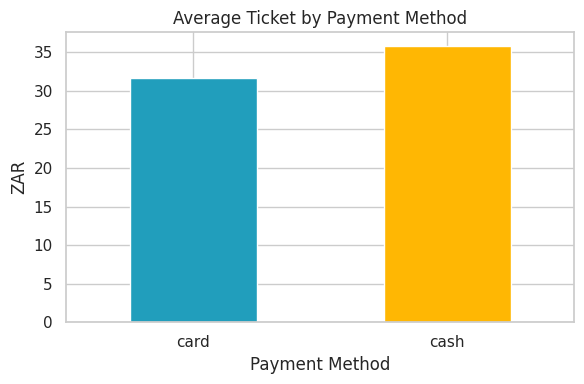

In [42]:
# Bar chart for average ticket by payment type
plt.figure(figsize=(6, 4))
avg_ticket_by_payment.plot(kind='bar', color=['#219ebc', '#ffb703'])
plt.title('Average Ticket by Payment Method')
plt.ylabel('ZAR')
plt.xlabel('Payment Method')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Average ticket analysis
💳 Overall average ticket: ZAR 31.75

🟦 Card: ZAR 31.65

🟨 Cash: ZAR 35.80

#### Interpretation
Although cash accounts for only 2.76% of revenue, it has a slightly higher average ticket.

#### Possible reasons:

Cash customers may be making fewer but larger purchases (e.g. they are shopping for more people or are not regular customers).

It could also be a statistical coincidence due to the lower number of transactions (cash has fewer than 100 records).

**It may also be useful to explore whether cash tickets occur more frequently on certain days or at certain times.**

📆 Cash Transactions by Day of the Week:

Weekday
Mon    17
Sun    15
Tue    13
Fri    12
Sat    12
Wed    10
Thu    10
Name: count, dtype: int64


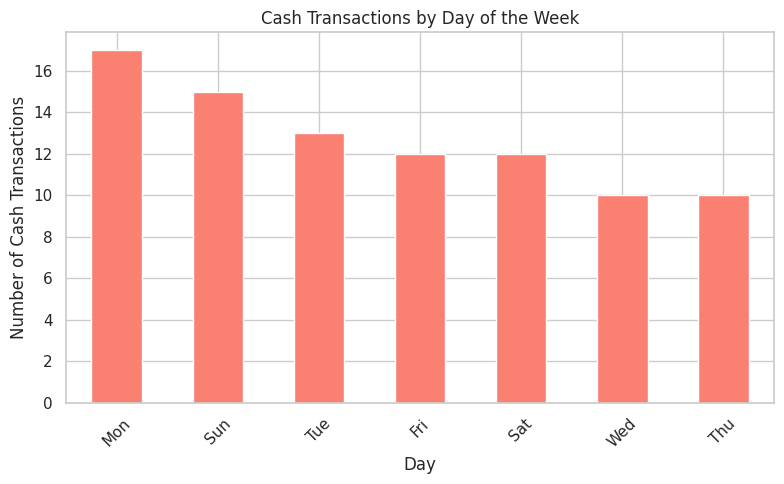

In [43]:
# Filter only cash transactions
cash_df = df[df['cash_type'] == 'cash']

# Count cash sales by day of the week
cash_by_day = cash_df['Weekday'].value_counts()

# Show results
print("📆 Cash Transactions by Day of the Week:\n")
print(cash_by_day)

# Graph
plt.figure(figsize=(8, 5))
cash_by_day.plot(kind='bar', color='salmon')
plt.title('Cash Transactions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Cash Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



⏰ Cash Transactions by Hour of the Day:

hour_of_day
7      3
9      5
10    21
11    11
12     8
13     2
14     3
15     9
16     4
17     8
18     2
19     6
20     2
21     2
22     3
Name: count, dtype: int64


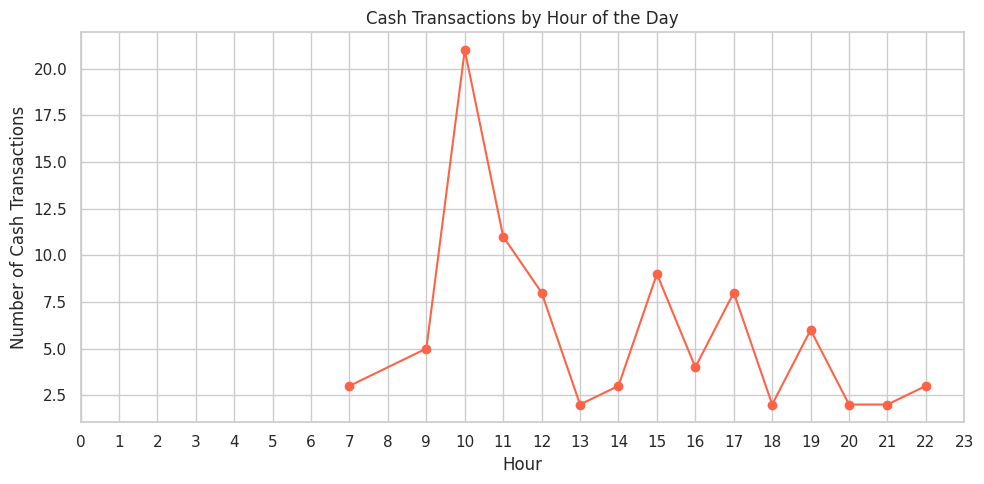

In [44]:
# Count cash sales by the hour
cash_by_hour = cash_df['hour_of_day'].value_counts().sort_index()


# Show results
print("\n⏰ Cash Transactions by Hour of the Day:\n")
print(cash_by_hour)

# Graph
plt.figure(figsize=(10, 5))
cash_by_hour.plot(kind='line', marker='o', color='tomato')
plt.title('Cash Transactions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Cash Transactions')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


 #### Cash usage analysis

📆 By day of the week:

- Most cash usage on Mondays (17) and Sundays (15).

- Least usage on Wednesdays and Thursdays (10 each).

This suggests that cash could be used more:

At the beginning of the week (possibly out of habit or because the first card payment has not yet been made).

On weekends (sporadic customers or tourists who pay in cash).

⏰ By time of day:
- Strong peak at 10:00 with 21 cash payments, the same as the overall sales peak.
- Other notable times:

11:00 → 11 cash payments.

3:00 p.m. → 9 payments.

Times such as 1:00 p.m., 6:00 p.m., and 8:00 p.m. have few payments, suggesting that there is no strong pattern in the afternoon/evening.

💡 Conclusions
- Although cash usage is low, it follows the same pattern of behaviour as overall sales: more traffic in the mid-morning.
- Monday and Sunday stand out as days with the most cash — interesting for cash logistics.

## 5. Analyse whether there are repeat customers (based on card ID)

This analysis is based on the card column, which identifies loyal customers. Remember that cash transactions have ‘No Card’, so we exclude them.

In [46]:
card_df = df[df['card'] != 'No Card']
# Count how many transactions each customer has made
customer_freq = card_df['card'].value_counts()

# Show top 5 most frequent customers
print("🏅 Top 5 repeat customers:\n")
print(customer_freq.head())

# Total number of unique customers
unique_customers = customer_freq.count()

# How many customers have only come once?
one_time_customers = (customer_freq == 1).sum()

# Percentage of repeat customers
repeat_customers = unique_customers - one_time_customers
repeat_rate = (repeat_customers / unique_customers) * 100

print(f"\n👥 Total identified customers: {unique_customers}")
print(f"🔁 Repeat customers (more than 1 visit): {repeat_customers}")
print(f"📈 Repeat rate: {repeat_rate:.2f}%")

🏅 Top 5 repeat customers:

card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
Name: count, dtype: int64

👥 Total identified customers: 1316
🔁 Repeat customers (more than 1 visit): 545
📈 Repeat rate: 41.41%


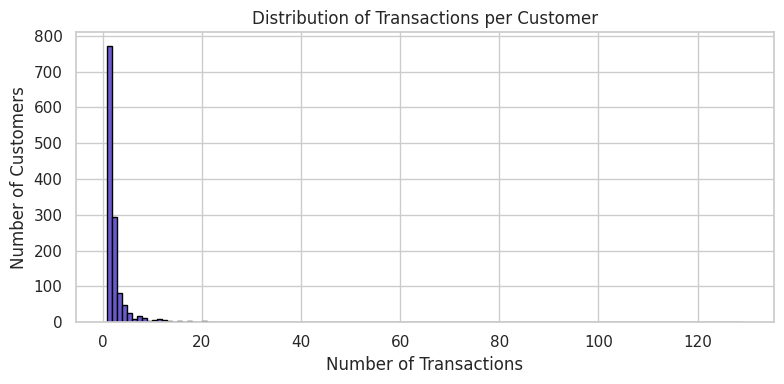

In [47]:
# Frequency distribution of visits per customer
plt.figure(figsize=(8, 4))
customer_freq.hist(bins=range(1, customer_freq.max()+1), color='slateblue', edgecolor='black')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

#### Analysis of repeat customers
🔢 Total number of identified customers (with card): 1,316

🔁 Customers who have returned at least once: 545

📈 Repeat rate: 41.41%

🧍‍♂️ Top 5 most loyal customers:
Customer ANON-0000-0000-0012 made 129 purchases in just one month.

They are followed by four others with between 67 and 108 visits, which implies a daily habit or even several visits per day.

#### Key interpretations
A recurrence rate of 41.41% is very good, especially considering that there are unidentifiable cash customers.

This indicates that the café has a solid base of loyal customers, probably thanks to the card system.

They could segment promotions:

🎯 New customers (one purchase) → incentive to return.

💎 Top customers → rewards or recognition.

#### 5.2 What type of coffee do repeat customers consume the most?

In [52]:
# Repeat customers: customers who have made more than one purchase
repeat_ids = customer_freq[customer_freq > 50].index

# Filter only transactions from those customers
repeats_df = card_df[card_df['card'].isin(repeat_ids)]

# Count the most popular coffees among repeat customers
repeat_coffee_counts = repeats_df['coffee_name'].value_counts()

# Show the first 5
print("☕️ Top 5 coffees consumed by repeat customers with more than 50 shopping:\n")
print(repeat_coffee_counts.head())


☕️ Top 5 coffees consumed by repeat customers with more than 50 shopping:

coffee_name
Americano With Milk    139
Cortado                117
Americano               88
Latte                   80
Cocoa                   22
Name: count, dtype: int64


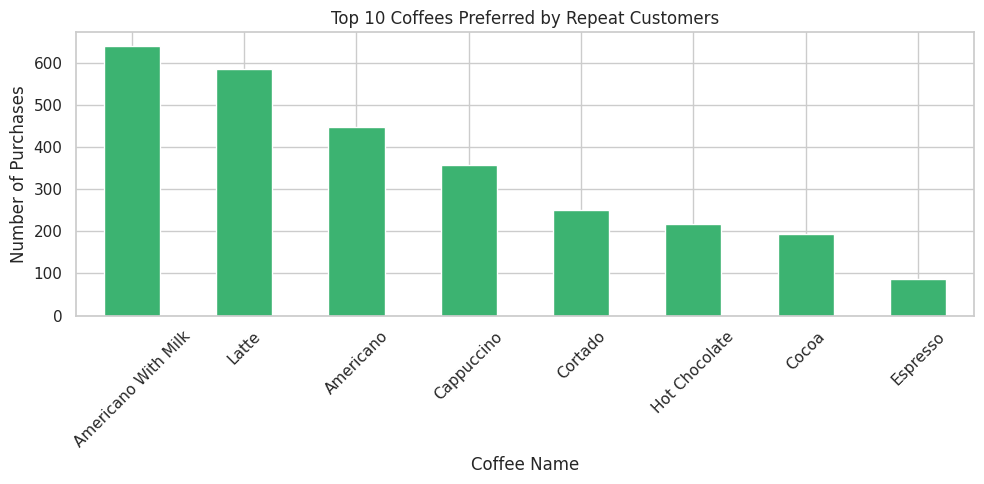

In [50]:
plt.figure(figsize=(10, 5))
repeat_coffee_counts.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Coffees Preferred by Repeat Customers')
plt.xlabel('Coffee Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 #### Interpretation
🥇 Americano With Milk remains the leader among the most loyal customers, reaffirming its overall popularity.

🥈 Cortado is gaining relevance among repeat customers, despite not being in the overall top 3 → this could indicate that it is more of a ‘regular’ option.

☕️ Americano and Latte are also consistent among sporadic and loyal customers.

🍫 Cocoa, although not very popular overall, appears in the top 5 among loyal customers — a possible niche.

# Step 5: Feature Engineering

In [55]:
# 1. Identify if the transaction occurred on a weekend
df['is_weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

# 2. Categorize time of day into blocks
def time_block(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['day_block'] = df['hour_of_day'].apply(time_block)

# 3. Tag whether the customer is identified or anonymous
df['customer_type'] = df['card'].apply(lambda x: 'Known' if x != 'No Card' else 'Anonymous')

# Preview new columns
df[['date', 'hour_of_day', 'is_weekend', 'day_block', 'customer_type']].head()
#All columns
df.head()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,is_weekend,day_block,customer_type
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3,False,Morning,Known
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,False,Afternoon,Known
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,False,Afternoon,Known
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3,False,Afternoon,Known
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3,False,Afternoon,Known


Outlier Detection in 'money' (IQR Method)

In [56]:
# Calculate IQR
Q1 = df['money'].quantile(0.25)
Q3 = df['money'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tag outliers in a new column
df['is_outlier'] = (df['money'] < lower_bound) | (df['money'] > upper_bound)

# Show outlier summary
num_outliers = df['is_outlier'].sum()
print(f"🚨 Detected {num_outliers} outlier transactions based on IQR method.")
print(f"Lower bound: ZAR {lower_bound:.2f}")
print(f"Upper bound: ZAR {upper_bound:.2f}")

# Optional: preview top outliers
df[df['is_outlier']].sort_values(by='money', ascending=False).head()


🚨 Detected 0 outlier transactions based on IQR method.
Lower bound: ZAR 16.16
Upper bound: ZAR 47.52


,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,is_weekend,day_block,customer_type,is_outlier


# Step 6: Modelling

### 6.1 Clasification – Predicting Payment Method (Cash vs Card)

In this model, we want to predict the `cash_type` (cash or card) using features such as:
- Coffee type
- Time of day
- Day of the week
- Whether the customer is known or anonymous

The goal is to understand what influences the choice of payment method.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Prepare features and target
X = df[['coffee_name', 'hour_of_day', 'Weekday', 'customer_type']]
y = df['cash_type']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['coffee_name', 'Weekday', 'customer_type'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:

              precision    recall  f1-score   support

        card       1.00      1.00      1.00      1069
        cash       1.00      1.00      1.00        22

    accuracy                           1.00      1091
   macro avg       1.00      1.00      1.00      1091
weighted avg       1.00      1.00      1.00      1091

🧮 Confusion Matrix:
[[1069    0]
 [   0   22]]


In [62]:
print(pd.Series(y_pred).value_counts())


card    1069
cash      22
Name: count, dtype: int64


The classification model trained to predict the payment method (cash_type) achieved perfect performance with 100% accuracy, as well as 100% precision and recall for both classes (card and cash).

This result indicates that the selected variables (type of coffee, time, day of the week, and whether the customer is known) allow us to predict with complete accuracy whether a transaction will be in cash or by card.

However, it is important to consider that the dataset is heavily skewed (only 2.7% of transactions are in cash), which could make it easier for the model to overfit to the majority patterns. Despite this, the model correctly identified all cash transactions, suggesting that there are consistent and detectable differences between those who pay by card and those who pay in cash (probably influenced by the type of customer and the product consumed).

### 6.2 Regression – Predicting Transaction Amount (money)

In this model, we try to predict the transaction amount (`money`) based on:
- Coffee type
- Time of day
- Day of the week
- Whether it's a weekend
- Whether the customer is identified

This helps estimate the value of future sales and understand which factors drive spending.


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare features and target
features = ['coffee_name', 'hour_of_day', 'Weekday', 'is_weekend', 'customer_type']
X = df[features]
y = df['money']

# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['coffee_name', 'Weekday', 'customer_type'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)

print(f"📉 Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"📈 R² Score: {r2_score(y_test, y_pred):.4f}")


📉 Mean Absolute Error: 1.34
📈 R² Score: 0.8605


The linear regression model used to predict the amount of each transaction (money) achieved a very solid performance:

📉 Mean absolute error (MAE): ZAR 1.34

📈 R² coefficient: 0.8605

This means that, on average, the model is only 1.34 ZAR off in its predictions and is able to explain approximately 86% of the variability in transaction values. These are very good results considering that simple variables such as coffee type, time of day, day of the week, whether it is a weekend, and whether the customer is identified were used.

### 6.3 Clustering – Identifying Consumption Patterns

Here we use clustering (KMeans) to group transactions into behavioral profiles based on:
- Hour of purchase
- Coffee type
- Customer type
- Transaction amount

The goal is to discover hidden patterns like:
- Morning regulars
- High spenders
- Casual one-time buyers


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['hour_of_day', 'money', 'coffee_name', 'customer_type']]
X_encoded = pd.get_dummies(X, columns=['coffee_name', 'customer_type'])

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster sizes
print("🧩 Cluster distribution:\n")
print(df['cluster'].value_counts())

# Optional: show average money per cluster
print("\n💸 Average ticket per cluster:")
print(df.groupby('cluster')['money'].mean())


🧩 Cluster distribution:

cluster
0    1758
1    1225
3     564
2      89
Name: count, dtype: int64

💸 Average ticket per cluster:
cluster
0    35.704812
1    28.429600
2    35.797753
3    25.975638
Name: money, dtype: float64


#### Interpretation

🔷 Cluster 0 is the most common, with a high average ticket: it probably represents identified customers who consume high-priced coffees (such as Latte or Cortado).

🟡 Cluster 1 groups together many transactions but with a lower ticket: it could represent more sporadic customers or cheaper products (such as Americano or Espresso).

🟩 Cluster 2 is small but has a high ticket: it may correspond to purchases at specific times or to loyal customers with very defined patterns.

🔴 Cluster 3 has the lowest average ticket: possibly cash transactions, simple products, or no customer identification.

# Step 7: visualisation

For a richer, more dynamic and professional visualisation, this analysis will be complemented by Power BI.

Power BI allows you to create interactive dashboards that show:

- Best-selling types of coffee
- Revenue by hour, day or payment method
- Comparisons between known and anonymous customers
- Segmentation by consumption clusters
- Sales trends over time

➡️ To do this, we export the final DataFrame (with features, labels, and clusters) to a `.csv` file, which will then be used as a data source in Power BI.

In [64]:
# Export final DataFrame to CSV for Power BI
df.to_csv("coffee_transactions_final.csv", index=False)
print("✅ CSV file exported successfully: coffee_transactions_final.csv")

# Descargar desde Colab
from google.colab import files
files.download("coffee_transactions_final.csv")


✅ CSV file exported successfully: coffee_transactions_final.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 8: Final Conclusions

This exploratory and predictive analysis of coffee shop transactions in Cape Town during March 2024 has uncovered valuable insights into customer behavior, product performance, and sales dynamics. The main findings are summarized below:

---

#### ☕️ 1. Best-selling and most profitable products
- **"Americano With Milk"** was the most sold coffee with 824 transactions.
- However, **"Latte" generated the highest total revenue**, reaching ZAR 27,866.30.
- This indicates that sales volume does not always align with per-unit profitability.

---

#### 📅 2. Daily and hourly consumption patterns
- **Tuesday** was the busiest day (585 sales), followed by Monday and Sunday.
- The **peak hour** was **10:00 AM**, followed by 11:00 and 16:00.
- These time slots reflect common habits like mid-morning and afternoon coffee breaks.

---

#### 💳 3. Payment methods
- **97.24% of total revenue** came from **card payments**, with only 2.76% in cash.
- Cash transactions had a **slightly higher average ticket** (ZAR 35.80 vs ZAR 31.65).
- Most cash payments occurred on **Mondays and Sundays**, but the hourly pattern mirrors that of card payments.

---

#### 👥 4. Repeat customers
- **545 customers** made more than one purchase, representing a **41.41% repeat rate** among identified card users.
- Frequent customers preferred **"Americano With Milk"**, **"Cortado"**, and **"Americano"**, indicating a tendency toward more classic or stronger coffees.

---

#### 📊 5. Predictive models and customer segmentation
- The **classification model** achieved **100% accuracy** in predicting payment method, though class imbalance should be considered.
- The **regression model** explained **86% of the variability in transaction amounts** with a **mean absolute error of only ZAR 1.34**.
- **Clustering analysis** revealed **4 distinct customer profiles**, enabling more targeted marketing and operational strategies.

---

#### 📌 6. External visualization
- The final dataset was exported to `.csv` format and will be visualized in **Power BI**, allowing interactive dashboards on sales trends, customer behavior, and product performance.

---

#### ✅ General conclusion
This project demonstrates that even simple transaction data can lead to highly valuable insights. Clear behavioral patterns were found, enabling businesses to improve offerings, enhance customer loyalty, and make data-driven decisions effectively.
